# Keyword Extraction Using NLP

In [1]:
import os
from tqdm import tqdm
# usr = os.getlogin()
# os.chdir('/Users/'+usr+'/Downloads/nlp-text-analysis-master')

In [2]:
path = 'C://Users//Subhashini Rajesh//Downloads//nlp-text-analysis-master//Text File'
path

'C://Users//Subhashini Rajesh//Downloads//nlp-text-analysis-master//Text File'

In [7]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
import re
from nltk.stem.wordnet import WordNetLemmatizer
stopword = stopwords.words('english')
stopword = set(stopword)
final_text = []
def preprocess_txt(dir_path):
    
    for i in tqdm(os.listdir(dir_path)):
        processed_text = ""
        with open(dir_path+"/" + i,"r", encoding='utf-8') as f:
            #reading the file
            text = f.read()
                     
            # lower the text
            text = text.lower()
            # remove all the thing inside bracket
            text = re.sub("[\<\(\[].*?[\)\]\>]", "", text).strip()
            # change shortform 
            text = text.replace("′", "'").replace("’", "'")\
                       .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                       .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                       .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                       .replace("he's", "he is").replace("she's", "she is")\
                       .replace("'ll", " will") 
            # remove special character  and punctuation
            text = re.sub(r'[^\w\s]', ' ', text) 
            text = re.sub(r"[^a-zA-Z0-9]+"," ",text) 
            # remove new line, tabs, \ , -
            text = re.sub("\n"," ",text)
            text = re.sub("\t"," ",text) 
            text = re.sub("-"," ",text)
            # reject everything that ends with : as they are subjects 
            text = re.sub(r'\w+:\s?','',text)
            # remove numbers
            text = re.sub("\S*\d\S*", " ", text)
            # remove multiple spaces
            text = re.sub('\\s+', ' ', text)
            
            #remove words include underscore
            text = re.sub(r"(\w+)_", " ", text)
            text = re.sub(r"_(\w+)", " ", text)
            
            #remove words less than 1 and 2 while it seperated by underscore (i.e) dr_berlin, d_berlin ----> berlin
            text = re.sub(r'(\w\w)_',"", text)
            text = re.sub(r'(\w)_', "", text)
            
            
                 
            # remove word that are less than one 
            for word in text.split(" "):
                if (len(word)>2) and (word not in stopword) and (len(word)<=20):
                    
                    processed_text +=word + " "
                    
            # Lemmatisation
            lem = WordNetLemmatizer()
            text = [lem.lemmatize(word) for word in text if not word in stopword] 
           
            
            # replace city with '_' and remove person name
            new = list()
            for chunk in ne_chunk(pos_tag(word_tokenize(processed_text))):
                try:
                    if chunk.label().lower() == 'person':
                        continue
                    else:
                        new.append('_'.join(c[0] for c in chunk))
                except AttributeError:
                    new.append(chunk[0])
            
                
        final_text.append(' '.join(new))  
        

In [8]:
preprocess_txt(path)

100%|██████████| 1/1 [00:04<00:00,  4.21s/it]


In [9]:
print(final_text)

['nature important integral part mankind one greatest blessings human life however nowadays humans fail recognize one nature inspiration numerous poets writers artists yesteryears remarkable creation inspired write poems stories glory truly valued nature reflects works even today essentially nature everything surrounded like water drink air breathe sun soak birds hear chirping moon gaze rich vibrant consists living non living things therefore people modern age also learn something people yesteryear start valuing nature gets late nature existence long humans ever since taken care mankind nourished forever words offers protective layer guards allkinds damages harms survival mankind without nature impossible humans need understand nature ability protect also powerful enough destroy entire mankind every form nature instance plants animals rivers mountains moon holds equal significance absence one element enough cause catastrophe functioning human life fulfill healthy lifestyle eating drink

In [11]:
import pandas as pd
data_frame = pd.DataFrame()
data_frame['content'] = final_text

In [13]:
# View 10 most common words prior to text pre-processing
freq = pd.Series(' '.join(map(str, data_frame['content'])).split()).value_counts()[:10]
freq

nature     15
mankind     5
water       4
life        4
people      3
use         3
one         3
must        3
causes      3
natural     3
dtype: int64

In [14]:
# View 10 least common words prior to text pre-processing
freq1 =  pd.Series(' '.join(map(str,data_frame['content'])).split()).value_counts()[-10:]
freq1

selfish        1
equal          1
poets          1
derived        1
soil           1
however        1
essentially    1
switch         1
learn          1
sun            1
dtype: int64

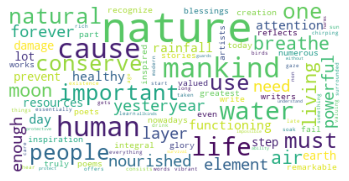

In [18]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(final_text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig(file_prefix + "wordcloud.png", dpi=900)

In [153]:
#https://github.com/andybywire/

In [20]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(min_df=0.3, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(final_text)

In [21]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['nature',
 'important',
 'integral',
 'part',
 'mankind',
 'one',
 'greatest',
 'blessings',
 'human',
 'life']

## Extract most frequently occurring keywords and n-grams

     Keyword  Frequency
0     nature         15
1    mankind          5
2       life          4
3      water          4
4  important          3
5        one          3
6     humans          3
7     people          3
8       also          3
9        use          3


[Text(0, 0, 'nature'),
 Text(1, 0, 'mankind'),
 Text(2, 0, 'life'),
 Text(3, 0, 'water'),
 Text(4, 0, 'important'),
 Text(5, 0, 'one'),
 Text(6, 0, 'humans'),
 Text(7, 0, 'people'),
 Text(8, 0, 'also'),
 Text(9, 0, 'use')]

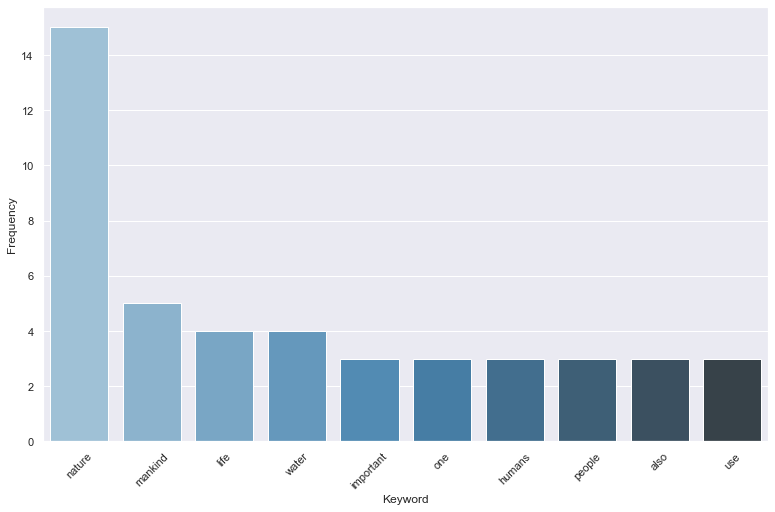

In [29]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(final_text, n=10)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
# top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
# g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

              Bi-gram  Frequency
0          human life          2
1         air breathe          2
2   natural resources          2
3    nature important          1
4  important integral          1
5       integral part          1
6        part mankind          1
7         mankind one          1
8        one greatest          1
9  greatest blessings          1


[Text(0, 0, 'human life'),
 Text(1, 0, 'air breathe'),
 Text(2, 0, 'natural resources'),
 Text(3, 0, 'nature important'),
 Text(4, 0, 'important integral'),
 Text(5, 0, 'integral part'),
 Text(6, 0, 'part mankind'),
 Text(7, 0, 'mankind one'),
 Text(8, 0, 'one greatest'),
 Text(9, 0, 'greatest blessings')]

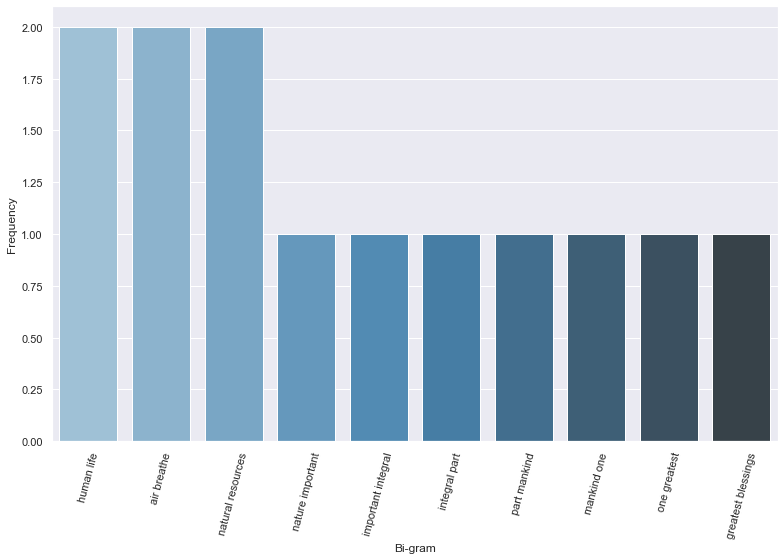

In [28]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(final_text, n=10)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
# top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
# h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

                    Tri-gram  Frequency
0  nature important integral          1
1    important integral part          1
2      integral part mankind          1
3           part mankind one          1
4       mankind one greatest          1
5     one greatest blessings          1
6   greatest blessings human          1
7       blessings human life          1
8         human life however          1
9      life however nowadays          1


[Text(0, 0, 'nature important integral'),
 Text(1, 0, 'important integral part'),
 Text(2, 0, 'integral part mankind'),
 Text(3, 0, 'part mankind one'),
 Text(4, 0, 'mankind one greatest'),
 Text(5, 0, 'one greatest blessings'),
 Text(6, 0, 'greatest blessings human'),
 Text(7, 0, 'blessings human life'),
 Text(8, 0, 'human life however'),
 Text(9, 0, 'life however nowadays')]

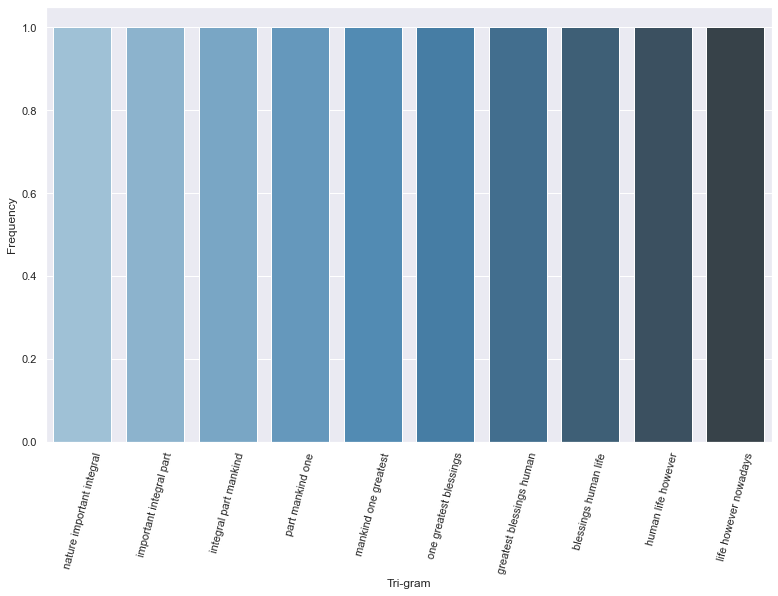

In [31]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(final_text, n=10)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)
# top3_df.to_csv(file_prefix + '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
# j.figure.savefig(file_prefix + "_tri-gram.png", bbox_inches = "tight")


## Extract a list of top TF-IDF terms

In [33]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents
ds_count = len(data_frame.content)
from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=final_text[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [35]:
# Sort tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

# import csv
# with open(file_prefix + 'td_idf.csv', 'w', newline="") as csv_file:  
#     writer = csv.writer(csv_file)
#     writer.writerow(["Keyword", "Importance"])
#     for key, value in keywords.items():
#        writer.writerow([key, value])


Abstract:
nature important integral part mankind one greatest blessings human life however nowadays humans fail recognize one nature inspiration numerous poets writers artists yesteryears remarkable creation inspired write poems stories glory truly valued nature reflects works even today essentially nature everything surrounded like water drink air breathe sun soak birds hear chirping moon gaze rich vibrant consists living non living things therefore people modern age also learn something people yesteryear start valuing nature gets late nature existence long humans ever since taken care mankind nourished forever words offers protective layer guards allkinds damages harms survival mankind without nature impossible humans need understand nature ability protect also powerful enough destroy entire mankind every form nature instance plants animals rivers mountains moon holds equal significance absence one element enough cause catastrophe functioning human life fulfill healthy lifestyle eat

In [37]:
!pip install yake

In [41]:
text = str(final_text)
print(type(text))

<class 'str'>


In [47]:
import yake
kw_extractor = yake.KeywordExtractor()
# text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
numOfKeywords = 25
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('nature', 0.007271186225050621)
('mankind', 0.016162933658699575)
('life', 0.01819692371524522)
('water', 0.01975509482178106)
('natural', 0.023715480792307442)
('humans', 0.0249845650558181)
('important', 0.025957025695147105)
('people', 0.025957025695147105)
('conserve', 0.025957025695147105)
('air', 0.03519491497278221)
('breathe', 0.03519491497278221)
('resources', 0.03519491497278221)
('human', 0.03747684758372715)
('moon', 0.03890138461974456)
('living', 0.03890138461974456)
('nourished', 0.03890138461974456)
('forever', 0.03890138461974456)
('layer', 0.03890138461974456)
('powerful', 0.03890138461974456)
('functioning', 0.03890138461974456)
('healthy', 0.03890138461974456)
('rainfall', 0.03890138461974456)
('attention', 0.03890138461974456)
('day', 0.03890138461974456)
('prevent', 0.03890138461974456)


In [48]:
import yake
kw_extractor = yake.KeywordExtractor()
# text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 25
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('air breathe', 0.002489699865917766)
('natural resources', 0.0025165960678974453)
('human life', 0.002742817353266484)
('resources life', 0.00514989904046301)
('drink air', 0.005643956886495141)
('breathe sun', 0.005643956886495141)
('breathe wood', 0.005643956886495141)
('resources replenish', 0.005643956886495141)
('functioning life', 0.0056953374021513495)
('life earth', 0.0056953374021513495)
('life forever', 0.0056953374021513495)
('balance natural', 0.0057049692487509684)
('natural assets', 0.0057049692487509684)
('chance natural', 0.0057049692487509684)
('preserve natural', 0.0057049692487509684)
('life fulfill', 0.00583734342523215)
('functioning human', 0.005865812148500737)
('blessings human', 0.0060120941535376)
('nowadays humans', 0.0060120941535376)
('humans fail', 0.0060120941535376)
('long humans', 0.0060120941535376)
('impossible humans', 0.0060120941535376)
('nourished forever', 0.006090136145246373)
('day day', 0.006090136145246373)
('prevent damage', 0.0060901361452

YAKE

In [49]:
import yake
kw_extractor = yake.KeywordExtractor()
# text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 25
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('natural resources life', 0.00036991348067275267)
('drink air breathe', 0.0004012220184570191)
('air breathe sun', 0.0004012220184570192)
('air breathe wood', 0.0004012220184570192)
('resources life forever', 0.0004048854430621662)
('chance natural resources', 0.0004055779979461104)
('natural resources replenish', 0.0004055779979461104)
('preserve natural resources', 0.0004055779979461104)
('functioning human life', 0.0004314155074217982)
('blessings human life', 0.00044222849283607904)
('human life fulfill', 0.00044222849283607904)
('functioning life earth', 0.0004479947567464321)
('life forever nourished', 0.0004479947567464321)
('conserve balance natural', 0.00044916032002341715)
('water drink air', 0.0004509651942501157)
('breathe sun soak', 0.0004550687938388514)
('resources replenish conclusion', 0.0004550687938388514)
('life fulfill healthy', 0.000459225526478292)
('responsible functioning life', 0.000459225526478292)
('life earth essential', 0.000459225526478292)
('balance nat

Rake-NLTK

In [50]:
!pip install rake_nltk

  Attempting uninstall: regex
    Found existing installation: regex 2020.10.15
    Uninstalling regex-2020.10.15:
      Successfully uninstalled regex-2020.10.15
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5


In [74]:
from rake_nltk import Rake
rake_nltk_var = Rake()
text = """spaCy is an open-source software library for advanced natural language processing,
written in the programming languages Python and Cython. The library is published under the MIT license
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()[:20]
print(keyword_extracted)

['advanced natural language processing', 'software company explosion', 'programming languages python', 'source software library', 'mit license', 'matthew honnibal', 'main developers', 'ines montani', 'library', 'written', 'spacy', 'published', 'open', 'founders', 'cython']


In [83]:
from rake_nltk import Rake
rake_nltk_var = Rake()
# text = str(final_text)
text = """nature important integral part mankind one greatest blessings human life however nowadays humans fail recognize one nature inspiration numerous poets writers artists yesteryears remarkable creation inspired write poems stories glory truly valued nature reflects works even today essentially nature everything surrounded like water drink air breathe sun soak birds hear chirping moon gaze rich vibrant consists living non living things therefore people modern age also learn something people yesteryear start valuing nature gets late nature existence long humans ever since taken care mankind nourished forever words offers protective layer guards allkinds damages harms survival mankind without nature impossible humans need understand nature ability protect also powerful enough destroy entire mankind every form nature is, instance plants animals rivers mountains was, moon holds equal significance absence one element enough cause catastrophe functioning human life fulfill healthy lifestyle eating drinking healthy nature gives similarly provides water food enables rainfall sunshine two important elements survive derived nature air breathe wood use various purposes gift nature technological advancements people paying attention nature need conserve balance natural assets rising day day requires immediate attention order conserve nature wemust take drastic steps right away prevent damage important step prevent deforestation levels cutting trees serious consequences different spheres cause soil erosion easilypolluting ocean water must strictly prohibited industries straightaway causes lot water shortage excessive use automobiles ovens emit lot chlorofluorocarbons depletes ozone layer turn causes global warming causes thermal expansion melting glaciers therefore avoid personal use vehicle switch public transport carpooling must invest solar energy giving chance natural resources replenish conclusion nature powerful transformative power responsible functioning life earth essential mankind flourish duty conserve future generations must stop selfish activities try best preserve natural resources life forever nourished earth also bring decline rainfall major level"""
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()[:20]
print(keyword_extracted)

['moon holds equal significance absence one element enough cause catastrophe functioning human life fulfill healthy lifestyle eating drinking healthy nature gives similarly provides water food enables rainfall sunshine two important elements survive derived nature air breathe wood use various purposes gift nature technological advancements people paying attention nature need conserve balance natural assets rising day day requires immediate attention order conserve nature wemust take drastic steps right away prevent damage important step prevent deforestation levels cutting trees serious consequences different spheres cause soil erosion easilypolluting ocean water must strictly prohibited industries straightaway causes lot water shortage excessive use automobiles ovens emit lot chlorofluorocarbons depletes ozone layer turn causes global warming causes thermal expansion melting glaciers therefore avoid personal use vehicle switch public transport carpooling must invest solar energy givin